In [6]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [4]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True
)
csv_path,_ = os.path.splitext(zip_path)

13568290/13568290 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
file_path='C:\\Users\\roozb\\.keras\\datasets\\jena_climate_2009_2016_extracted\\jena_climate_2009_2016.csv'
df = pd.read_csv(file_path)
df=df[5::6]
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:26]

<Axes: xlabel='Date Time'>

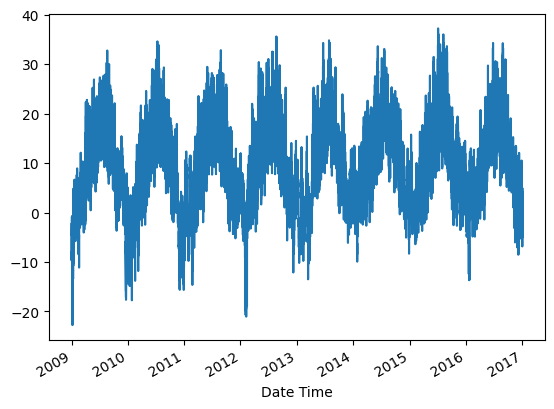

In [15]:
temp = df['T (degC)']
temp.plot()

In [23]:
def df_to_x_y(df,window_size=5):
    df_as_np = df.to_numpy()
    x=[]
    y=[]
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        x.append(row)
        y.append(df_as_np[i+window_size])
    return np.array(x), np.array(y)    

x, y = df_to_x_y(temp)


array([-9.67, -9.17, -8.1 , ..., -2.75, -2.89, -3.93])

In [25]:
x_train, y_train = x[:60000], y[:60000]
x_val, y_val = x[60000:65000], y[60000:65000]
x_test, y_test = x[65000:], y[65000:]


((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(layers.InputLayer((5,1)))
model1.add(layers.LSTM(64))
model1.add(layers.Dense(8, 'relu'))
model1.add(layers.Dense(1,'linear'))
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
cp = ModelCheckpoint('C:\\Users\\roozb\\.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001))
model1.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.6210 - val_loss: 0.4789
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6112 - val_loss: 0.4838
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6111 - val_loss: 0.4860
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6177 - val_loss: 0.4826
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6353 - val_loss: 0.4801
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.6171 - val_loss: 0.4796
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.6161 - val_loss: 0.4850
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.6290 - val_loss: 0.4830
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.6111 - val_loss: 0.4788
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.6208 - val_loss: 0.4980


In [49]:
train_predictions=model1.predict(x_train).flatten()
train_results = pd.DataFrame(data={'train_predictions':train_predictions,'actuals':y_train})
train_results

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


,train_predictions,actuals
0,-9.981661,-9.67
1,-9.778825,-9.17
2,-8.843608,-8.10
3,-7.327757,-7.66
4,-7.216090,-7.04
...,...,...
59995,6.326642,6.07
59996,7.197068,9.88
59997,12.424774,13.53
59998,15.712649,15.43


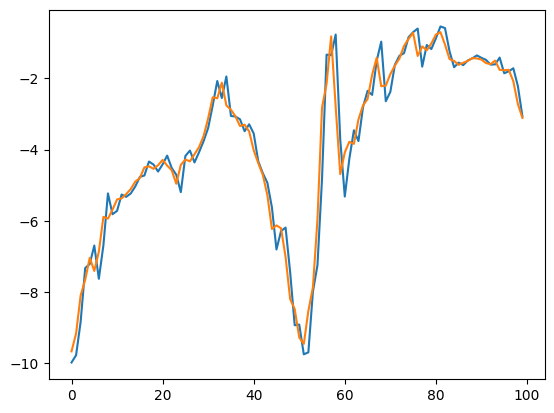

In [53]:
import matplotlib.pyplot as plt
plt.plot(train_results['train_predictions'][:100])
plt.plot(train_results['actuals'][:100])